# Import all libs

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<AxesSubplot: >

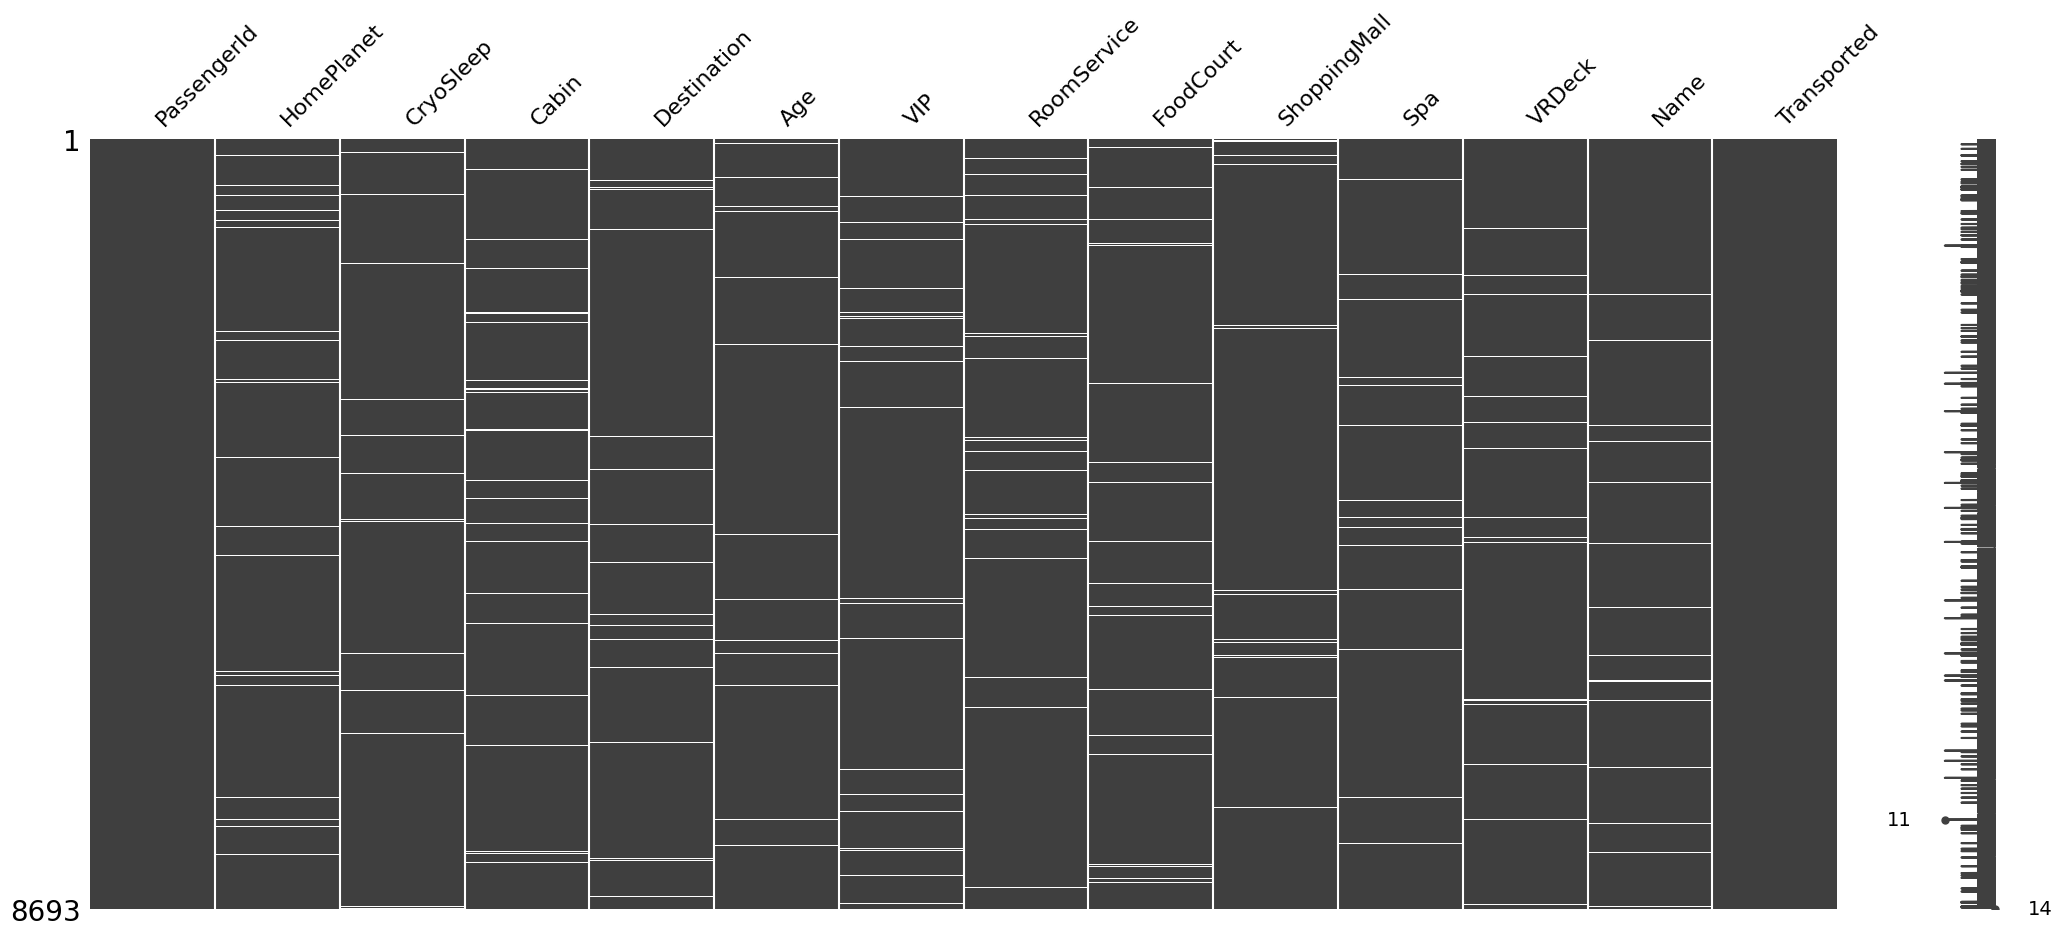

In [6]:
missingno.matrix(df_train)

<AxesSubplot: >

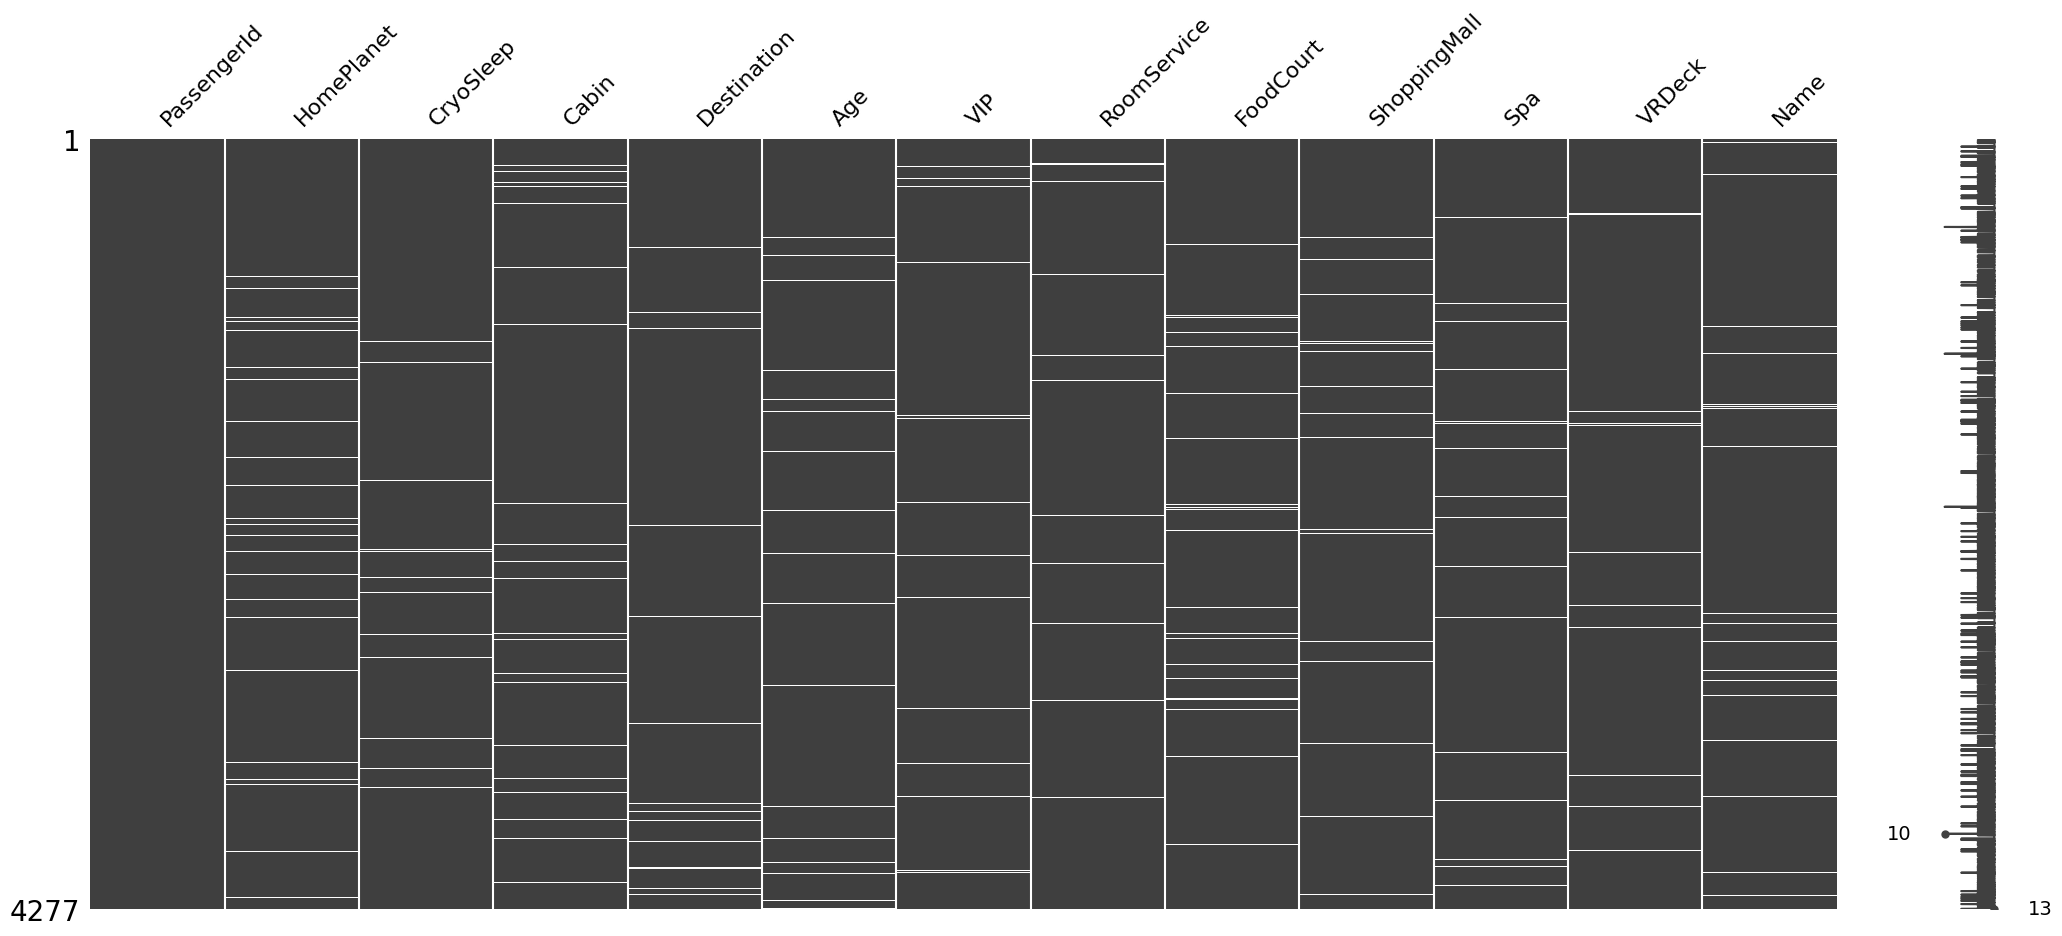

In [7]:
missingno.matrix(df_test)

In [8]:
df_data = pd.concat([df_train, df_test], axis=0)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


<AxesSubplot: >

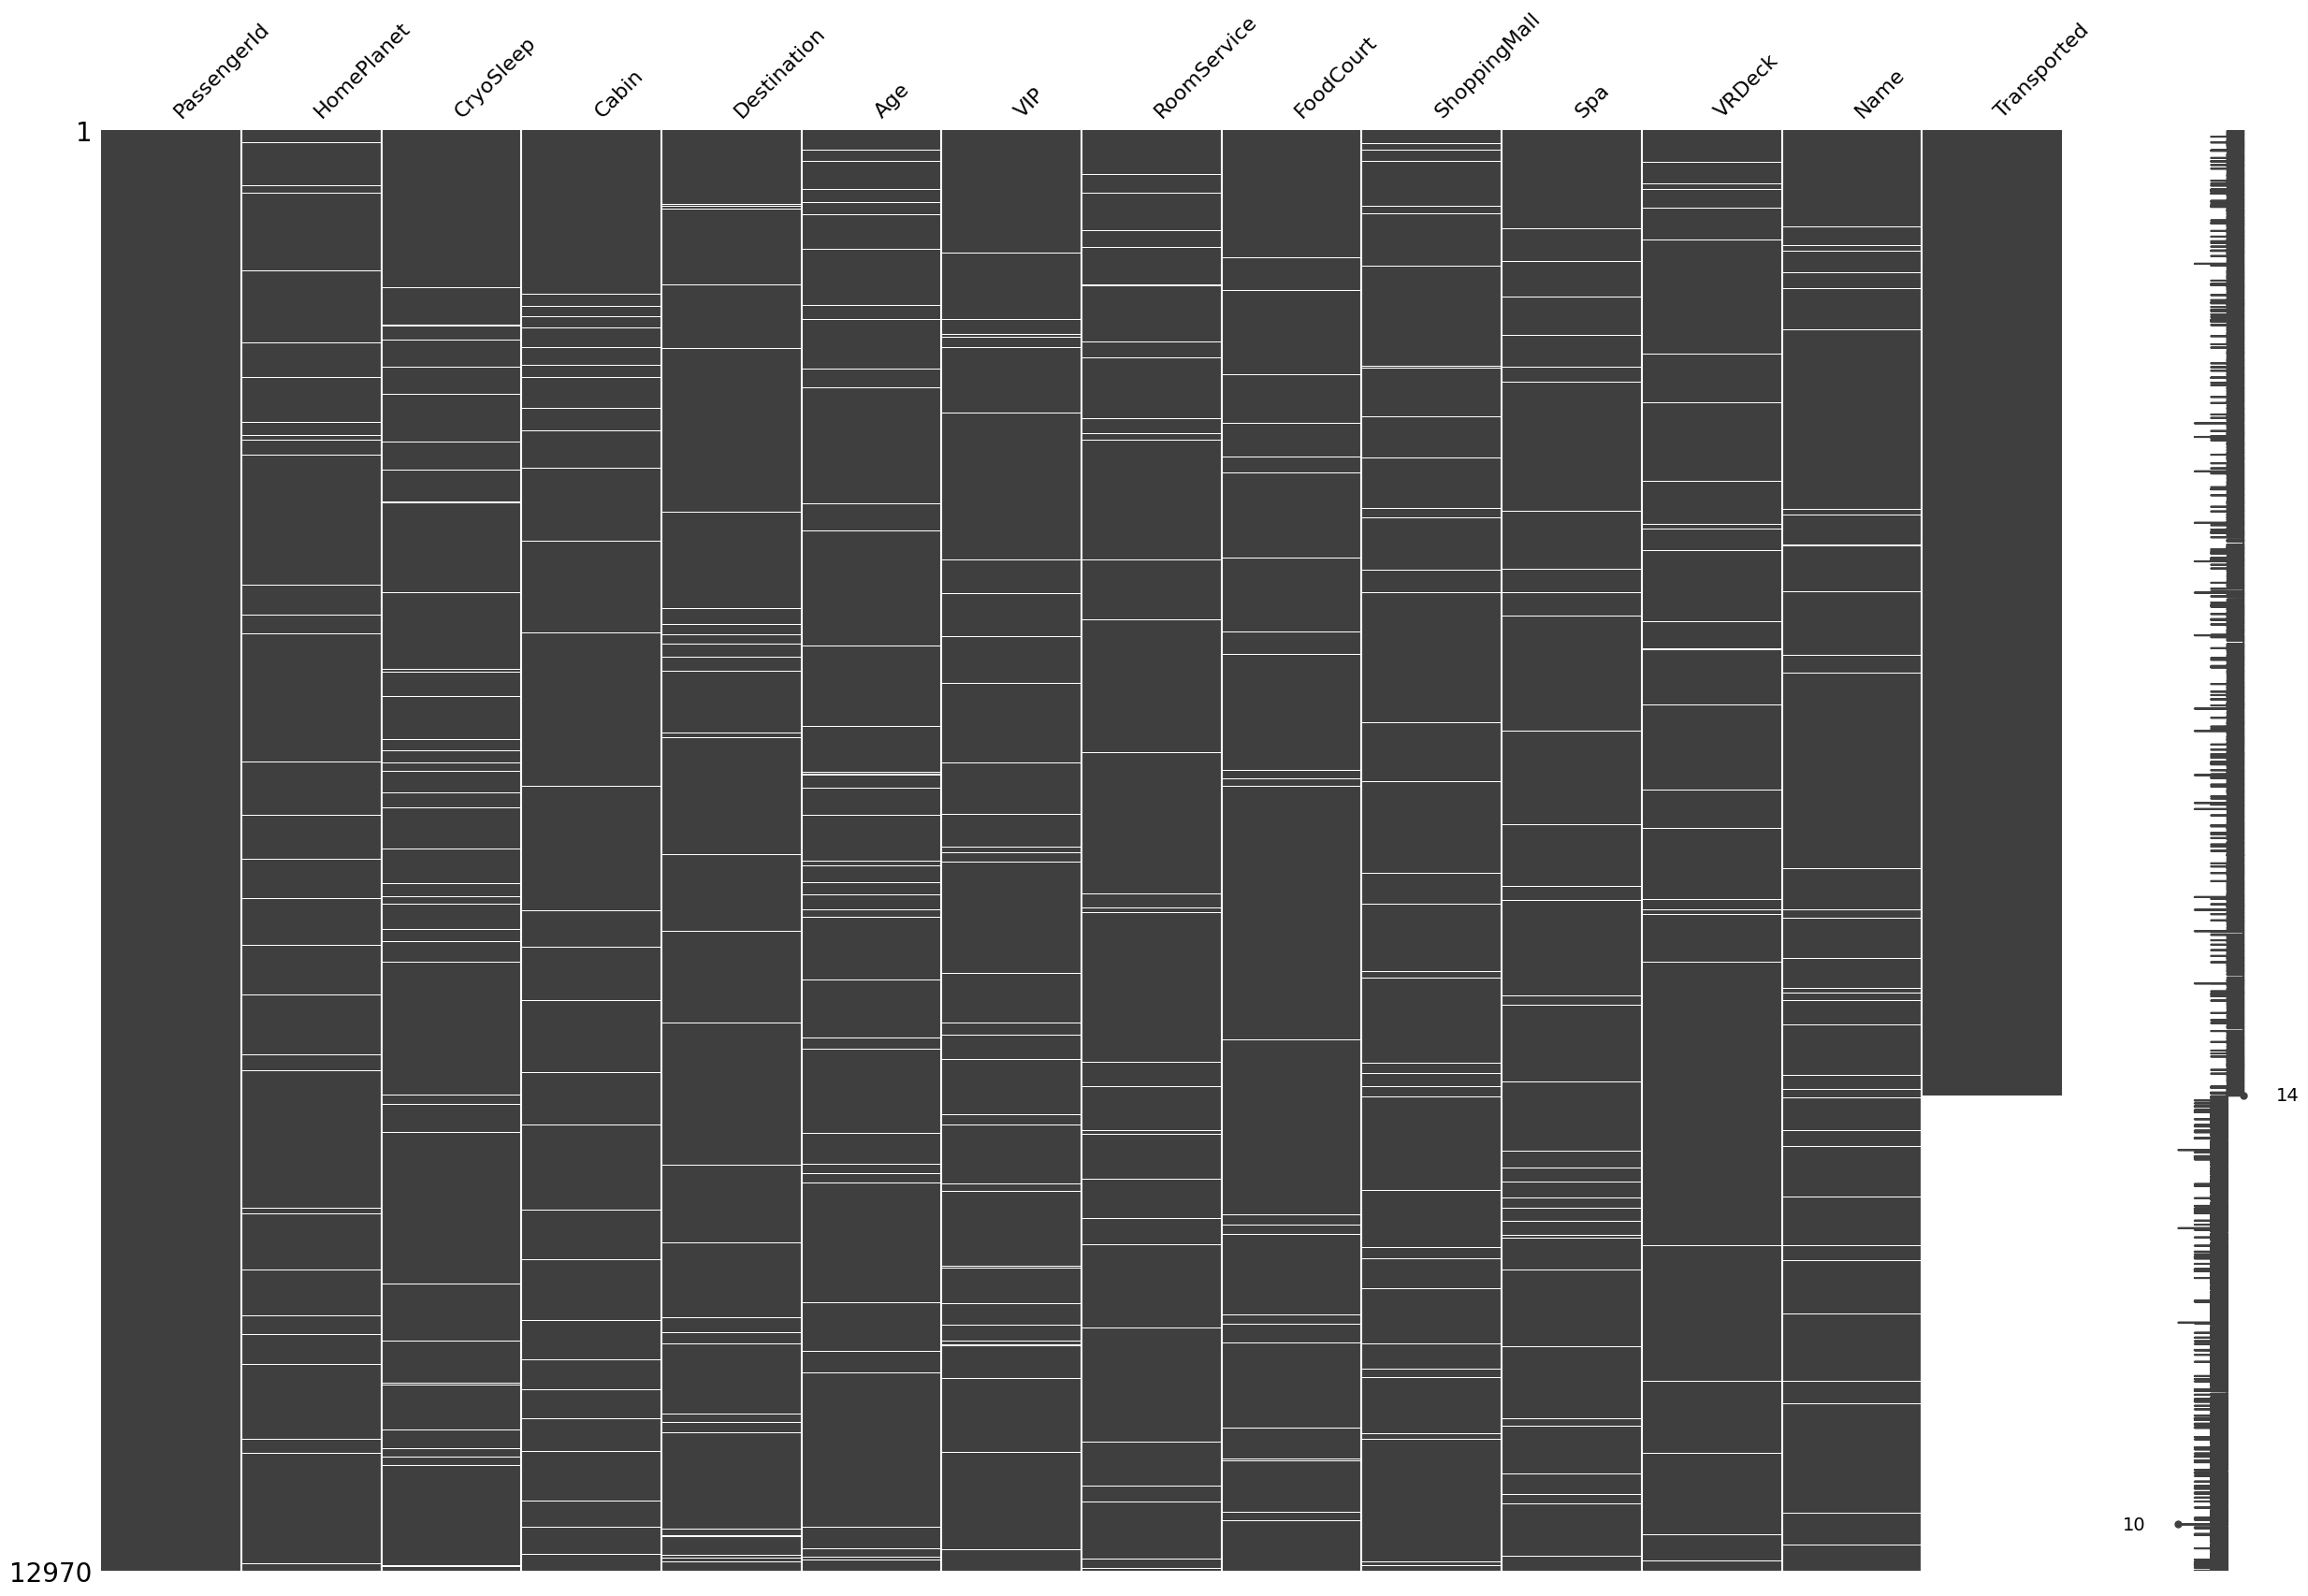

In [10]:
missingno.matrix(df_data, figsize=(30,20))

# Groups of Features

- Categorical features: HomePlanet, CryoSleep, Cabin, Destination, VIP, Name, Transported

- Numerical features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

# Processing missing data

In [11]:
df_train.groupby('HomePlanet').size()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
dtype: int64

In [12]:
df_test.groupby('HomePlanet').size()

HomePlanet
Earth     2263
Europa    1002
Mars       925
dtype: int64

In [13]:
df_train.groupby('CryoSleep').size()

CryoSleep
False    5439
True     3037
dtype: int64

In [14]:
df_test.groupby('CryoSleep').size()

CryoSleep
False    2640
True     1544
dtype: int64

In [15]:
df_train.groupby('Cabin').size()

Cabin
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Length: 6560, dtype: int64

In [16]:
df_test.groupby('Cabin').size()

Cabin
A/1/P      1
A/105/S    2
A/108/S    1
A/109/S    1
A/11/P     2
          ..
G/997/S    1
T/0/S      1
T/1/S      1
T/3/S      3
T/4/P      1
Length: 3265, dtype: int64

In [17]:
df_train.groupby('Destination').size()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
dtype: int64

In [18]:
df_test.groupby('Destination').size()

Destination
55 Cancri e       841
PSO J318.5-22     388
TRAPPIST-1e      2956
dtype: int64

In [19]:
df_train.groupby('VIP').size()

VIP
False    8291
True      199
dtype: int64

In [20]:
df_test.groupby('VIP').size()

VIP
False    4110
True       74
dtype: int64

In [21]:
df_train.groupby('Name').size()

Name
Aard Curle           1
Aarjel Jaff          1
Aarjel Rhuba         1
Aark Ches            1
Aark Homin           1
                    ..
Zosmark Unaasor      1
Zosmas Ineedeve      1
Zosmas Mormonized    1
Zubeneb Flesping     1
Zubeneb Pasharne     1
Length: 8473, dtype: int64

In [22]:
df_test.groupby('Name').size()

Name
Aard Backo          1
Aard Kraie          1
Aarjel Vlate        1
Aark Ane            1
Aark Man            1
                   ..
Zosmar Inkcablel    1
Zosmas Reswiress    1
Zubeneb Camaxler    1
Zubens Blentrary    1
Zubens Peterive     1
Length: 4176, dtype: int64

## Dropping useless columns

In [23]:
df_train.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [24]:
df_test.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [27]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [28]:
df_train[num_cols].corr().round(4)

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
Age           1.0000       0.0687     0.1304        0.0331  0.1240  0.1010
RoomService   0.0687       1.0000    -0.0159        0.0545  0.0101 -0.0196
FoodCourt     0.1304      -0.0159     1.0000       -0.0142  0.2219  0.2280
ShoppingMall  0.0331       0.0545    -0.0142        1.0000  0.0139 -0.0073
Spa           0.1240       0.0101     0.2219        0.0139  1.0000  0.1538
VRDeck        0.1010      -0.0196     0.2280       -0.0073  0.1538  1.0000

<AxesSubplot: >

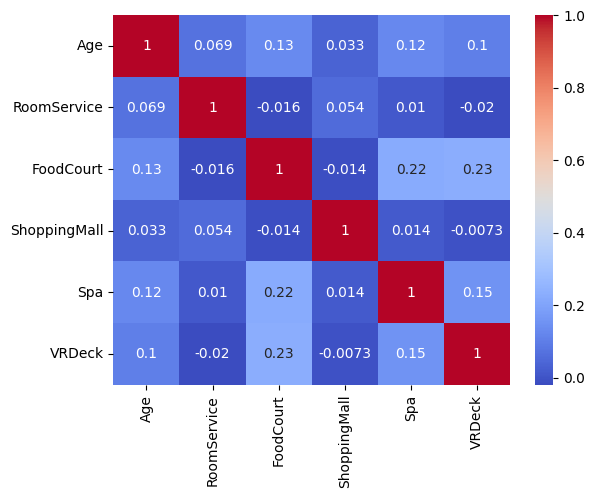

In [29]:
sns.heatmap(data=df_train[num_cols].corr().round(4), annot=True, cmap='coolwarm')

In [30]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

## Age vs Transported

<AxesSubplot: xlabel='Age', ylabel='Density'>

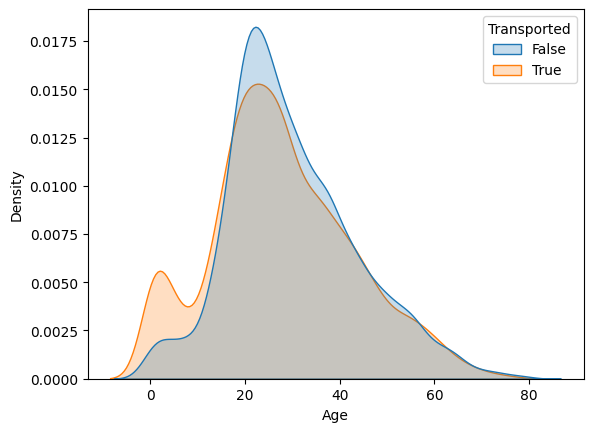

In [31]:
sns.kdeplot(data=df_train, x='Age', hue='Transported', fill=True)

## Age vs HomePlanet

<AxesSubplot: xlabel='Age', ylabel='Density'>

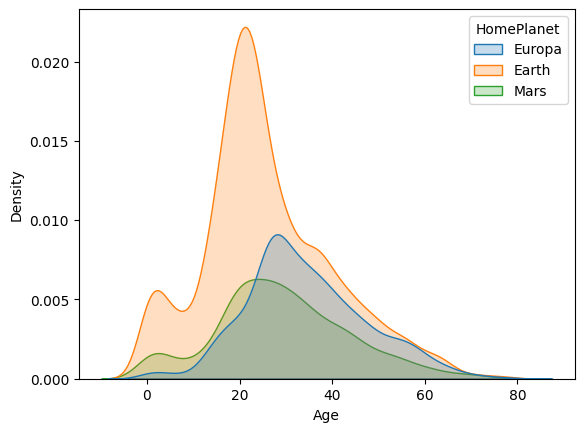

In [32]:
sns.kdeplot(data=df_train, x='Age', hue='HomePlanet', fill=True)

## HomePlanet vs Transported

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

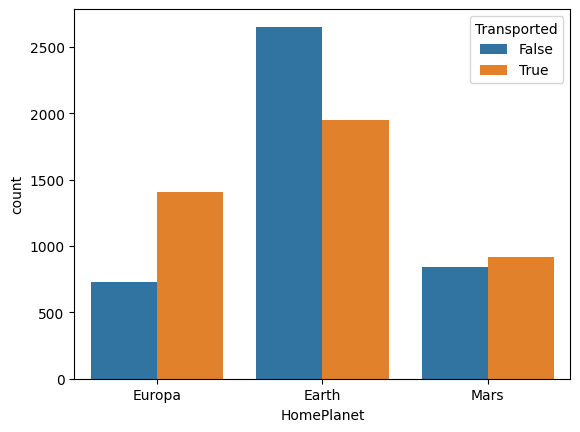

In [33]:
sns.countplot(data=df_train, x='HomePlanet', hue='Transported')

## CryoSleep vs Transported

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

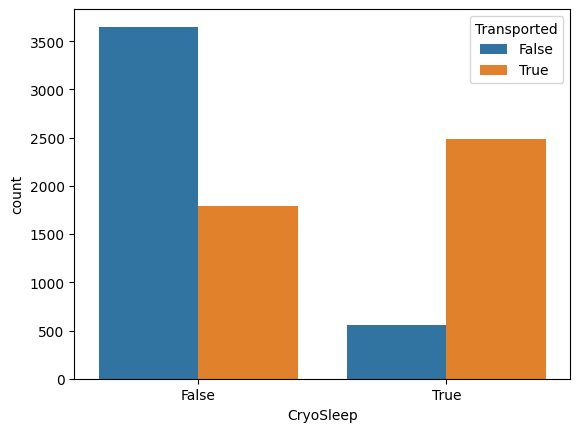

In [34]:
sns.countplot(data=df_train, x='CryoSleep', hue='Transported')

## HomePlanet vs Destination

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

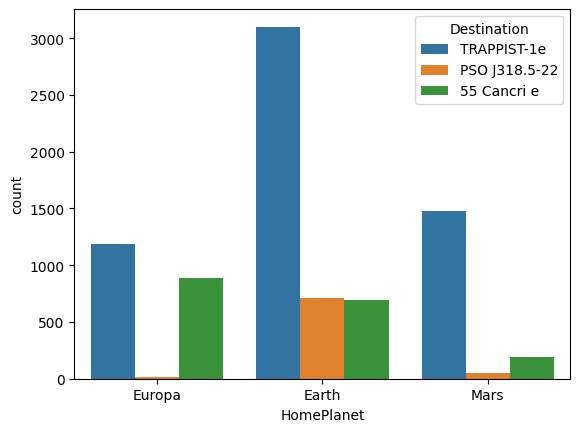

In [35]:
sns.countplot(data=df_train, x='HomePlanet', hue='Destination')

## Destination vs Transported

<AxesSubplot: xlabel='Destination', ylabel='count'>

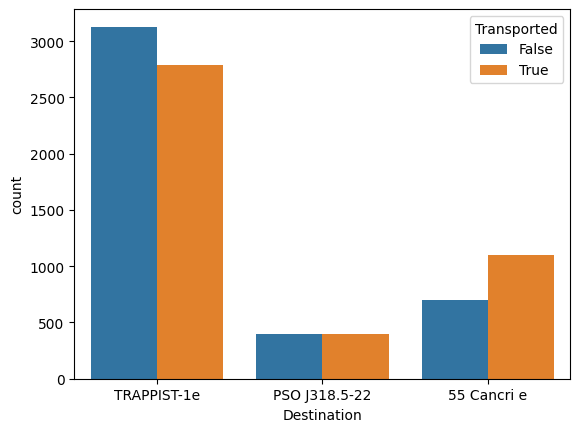

In [36]:
sns.countplot(data=df_train, x='Destination', hue='Transported')

## VIP vs Transported

<AxesSubplot: xlabel='VIP', ylabel='count'>

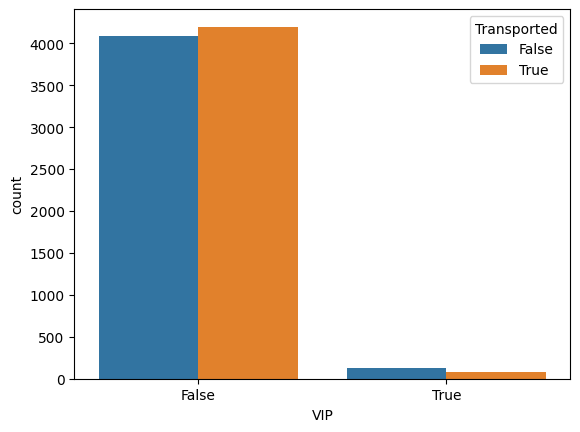

In [37]:
sns.countplot(data=df_train, x='VIP', hue='Transported')

## Destination vs Age

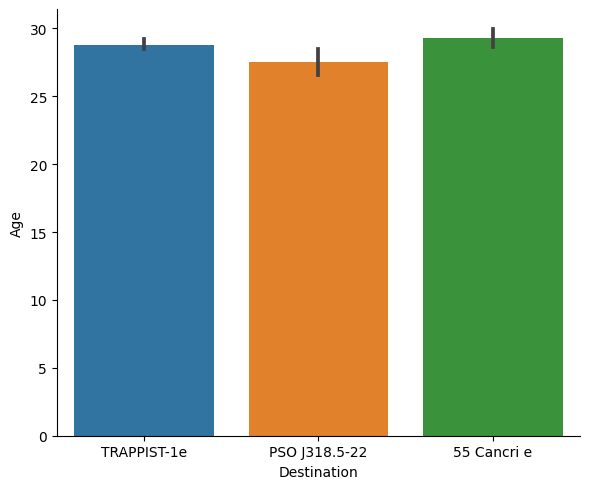

In [38]:
sns.catplot(data=df_train, x='Destination', y='Age', kind='bar', aspect=1.2)

## Transported vs RoomService

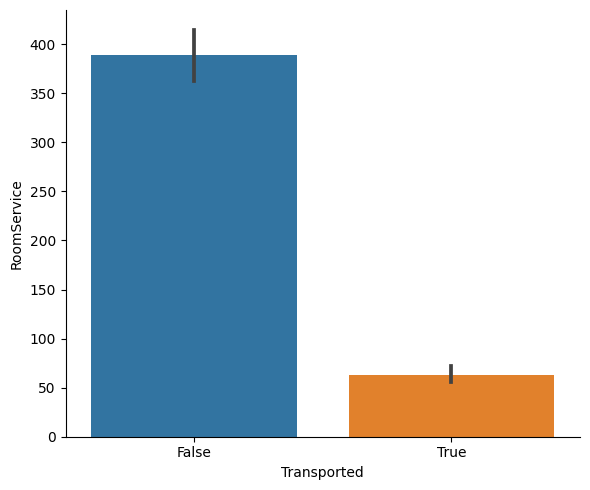

In [39]:
sns.catplot(data=df_train, x='Transported', y='RoomService', kind='bar', aspect=1.2)

<AxesSubplot: xlabel='RoomService', ylabel='Density'>

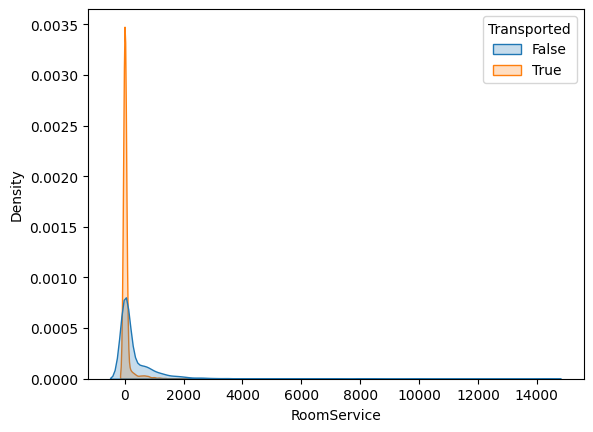

In [40]:
sns.kdeplot(data=df_train, x='RoomService', hue='Transported', fill=True)

## Transported vs FoodCourt

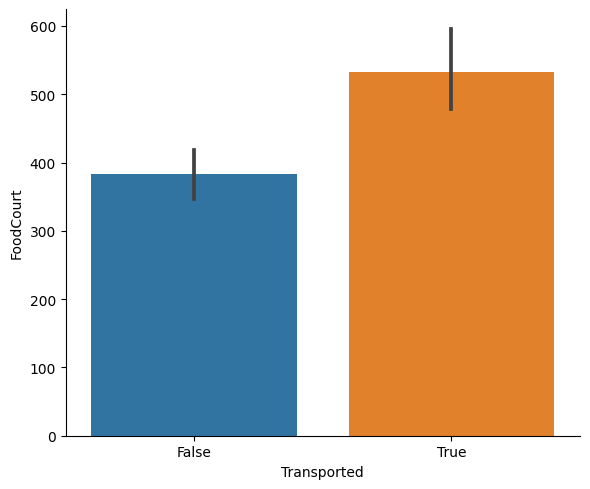

In [41]:
sns.catplot(data=df_train, x="Transported", y="FoodCourt", kind="bar", aspect=1.2)

<AxesSubplot: xlabel='FoodCourt', ylabel='Density'>

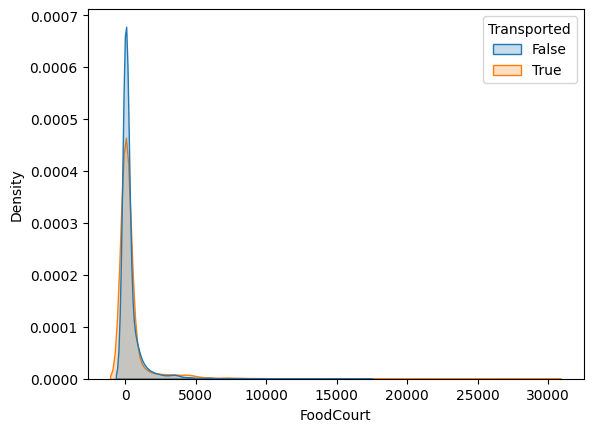

In [42]:
sns.kdeplot(data=df_train, x='FoodCourt', hue='Transported', fill=True)

## Transported vs ShoppingMall

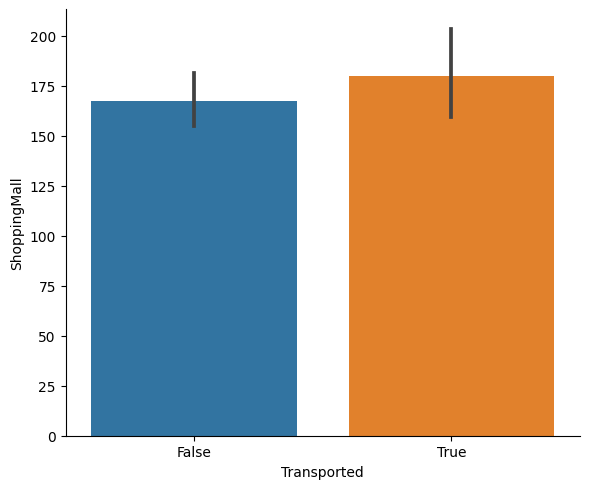

In [43]:
sns.catplot(data=df_train, x="Transported", y="ShoppingMall", kind="bar", aspect=1.2)

<AxesSubplot: xlabel='ShoppingMall', ylabel='Density'>

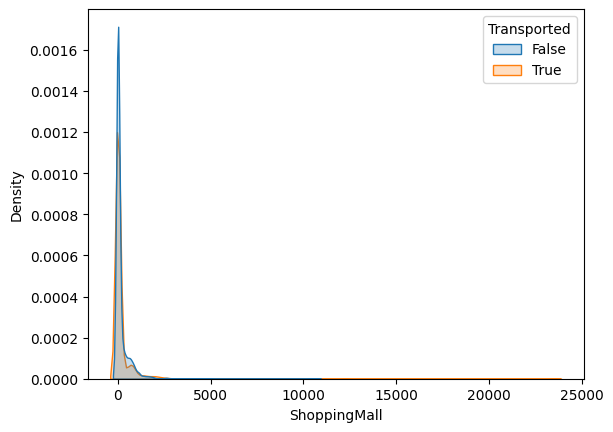

In [44]:
sns.kdeplot(data=df_train, x='ShoppingMall', hue='Transported', fill=True)

## Transported vs Spa

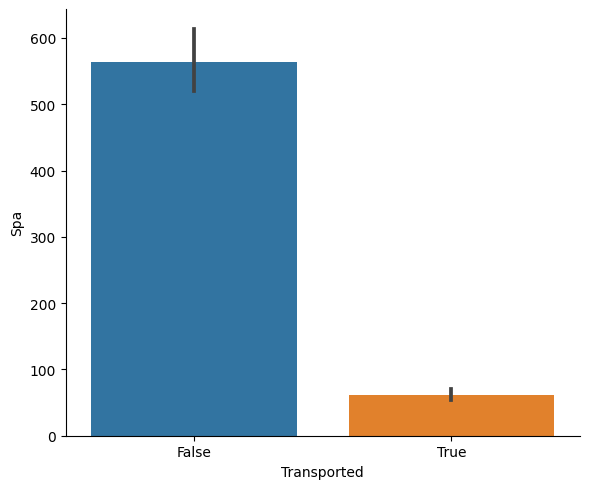

In [45]:
sns.catplot(data=df_train, x="Transported", y="Spa", kind="bar", aspect=1.2)

<AxesSubplot: xlabel='Spa', ylabel='Density'>

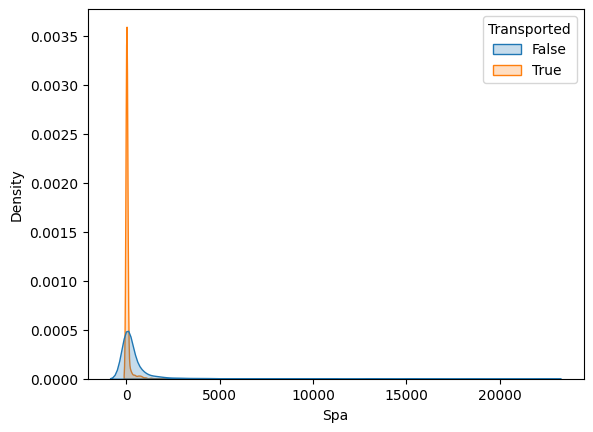

In [46]:
sns.kdeplot(data=df_train, x='Spa', hue='Transported', fill=True)

## Transported vs VRDeck

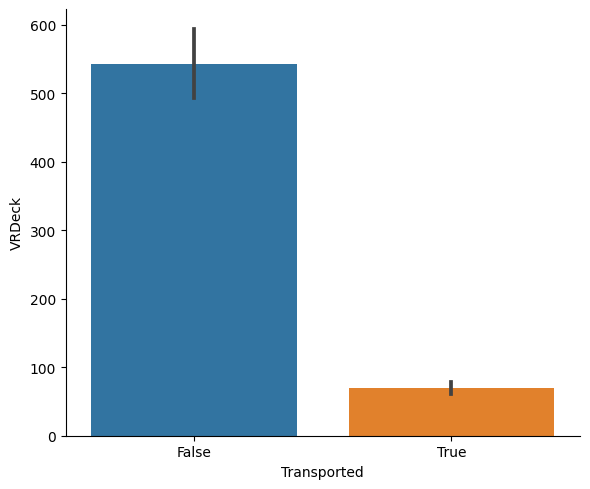

In [47]:
sns.catplot(data=df_train, x="Transported", y="VRDeck", kind="bar", aspect=1.2)

<AxesSubplot: xlabel='VRDeck', ylabel='Density'>

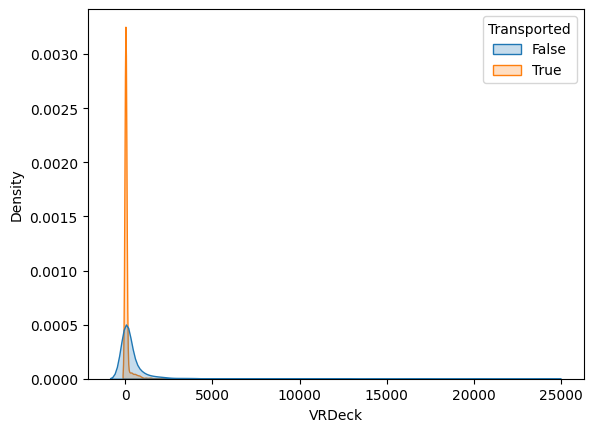

In [48]:
sns.kdeplot(data=df_train, x='VRDeck', hue='Transported', fill=True)

# Insights:

- Between numerical features doesn't have any considerate correlation

- Between categorical features:
     - Most of passengers between 20-30 years was transported
     - Most of passengers in CyproSleep couldn't transported
     - Most of passengers in VIP couldn't transported
     - Most of passengers are from Earth and had transported
     - Fill the missing data using most frequent data for categorical features
     - Fill with the mean value for numerical features

##### For numerical data

In [49]:
df_train.Age.fillna(df_train.Age.mean(), inplace = True)
df_train.RoomService.fillna(df_train.RoomService.mean(), inplace = True)
df_train.FoodCourt.fillna(df_train.FoodCourt.mean(), inplace = True)
df_train.ShoppingMall.fillna(df_train.ShoppingMall.mean(), inplace = True)
df_train.Spa.fillna(df_train.Spa.mean(), inplace = True)
df_train.VRDeck.fillna(df_train.VRDeck.mean(), inplace = True)

<AxesSubplot: >

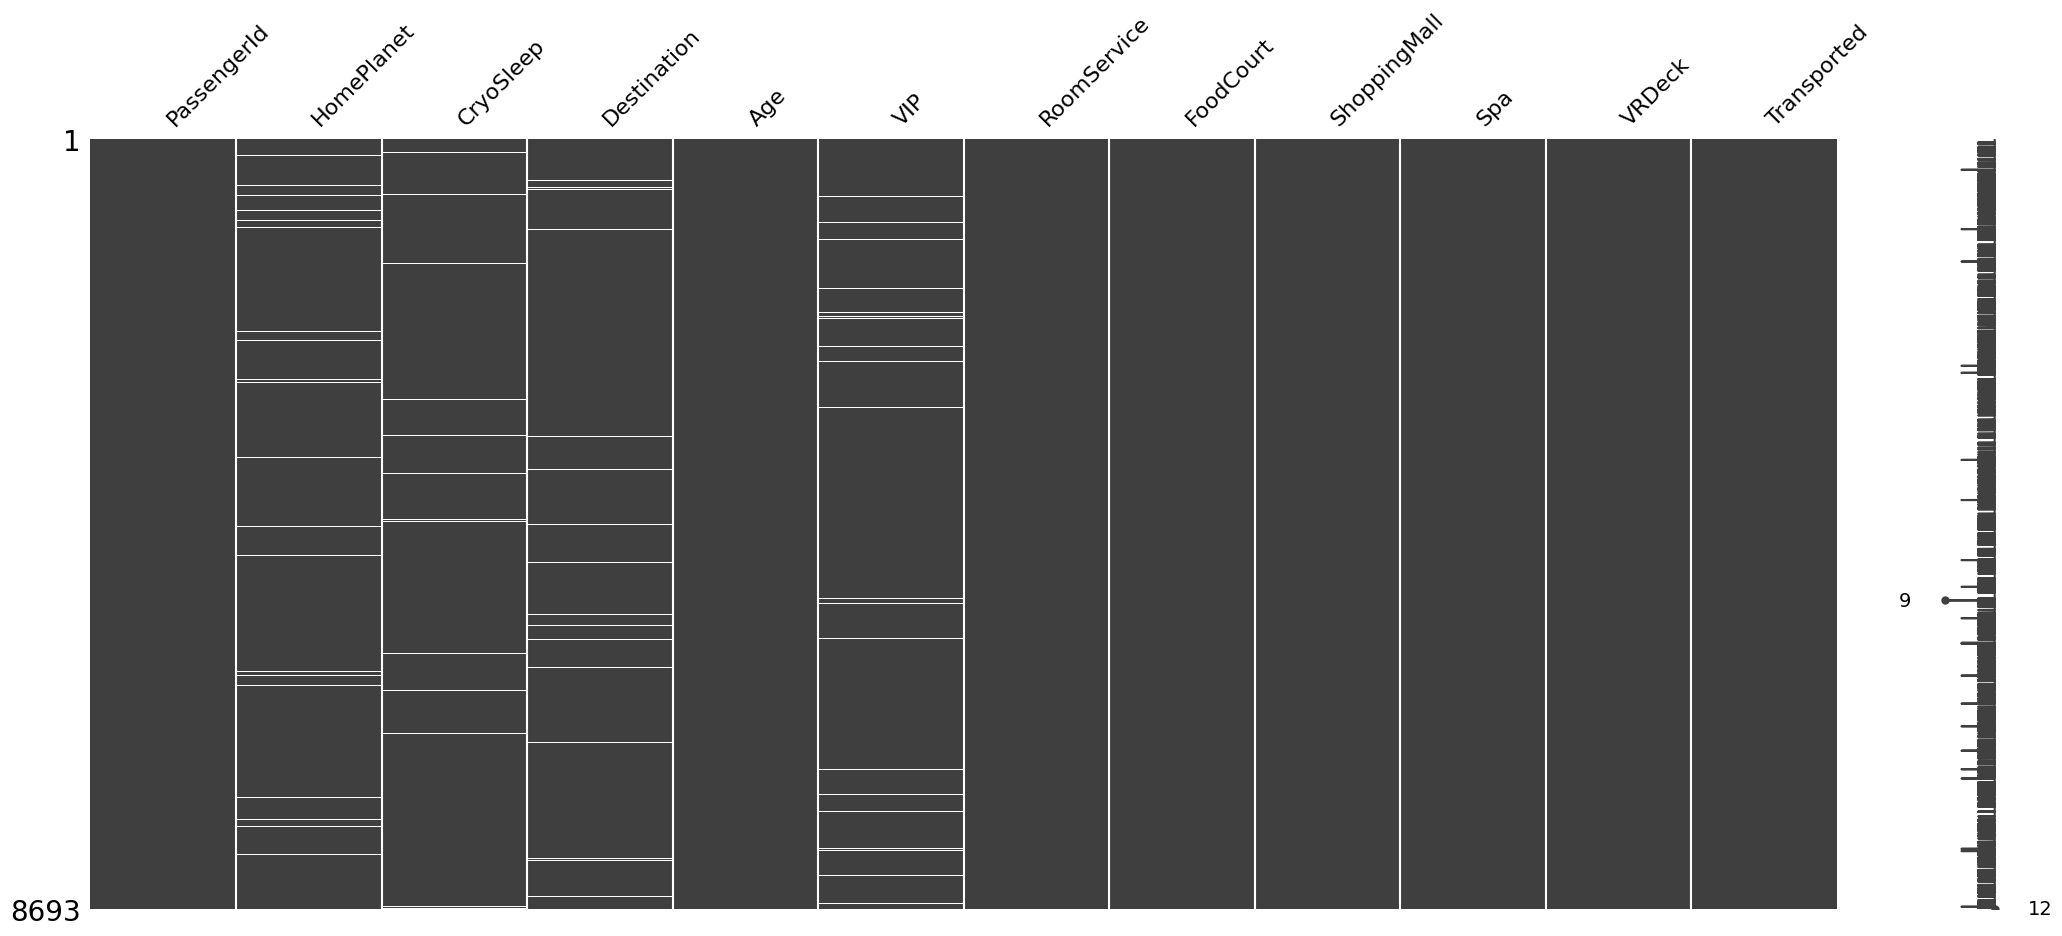

In [50]:
missingno.matrix(df_train)

In [51]:
df_test.Age.fillna(df_test.Age.mean(), inplace = True)
df_test.RoomService.fillna(df_test.RoomService.mean(), inplace = True)
df_test.FoodCourt.fillna(df_test.FoodCourt.mean(), inplace = True)
df_test.ShoppingMall.fillna(df_test.ShoppingMall.mean(), inplace = True)
df_test.Spa.fillna(df_test.Spa.mean(), inplace = True)
df_test.VRDeck.fillna(df_test.VRDeck.mean(), inplace = True)

<AxesSubplot: >

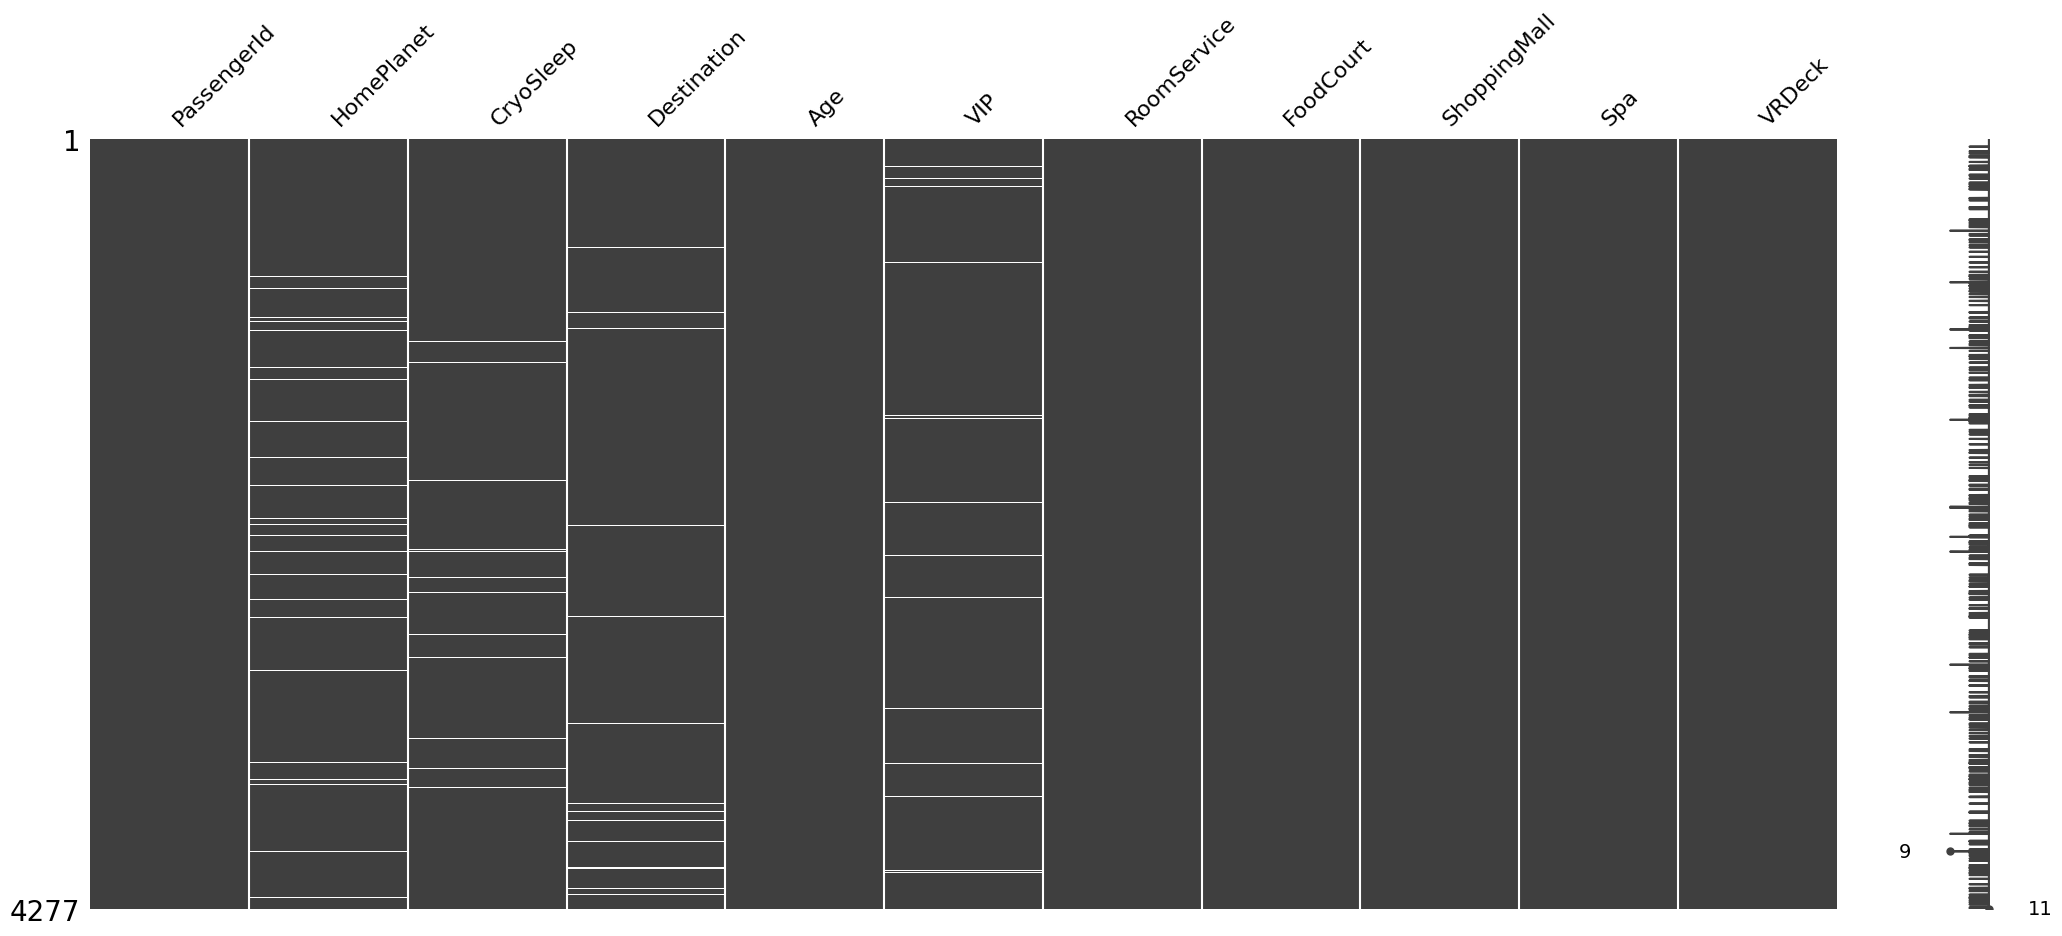

In [52]:
missingno.matrix(df_test)

##### For numerical data

In [53]:
num_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

Missing data in numerical:
- HomePlanet
- CryoSleep
- Destination
- VIP

In [54]:
string_counts_home = df_train["HomePlanet"].value_counts()
string_counts_cryo = df_train["CryoSleep"].value_counts()
string_counts_destination = df_train["Destination"].value_counts()
string_counts_vip = df_train["VIP"].value_counts()

max_string_home = string_counts_home.idxmax()
max_string_cryo = string_counts_cryo.idxmax()
max_string_destination = string_counts_destination.idxmax()
max_string_vip = string_counts_vip.idxmax()

In [55]:
df_train.HomePlanet.fillna(max_string_home, inplace = True)
df_train.CryoSleep.fillna(max_string_cryo, inplace = True)
df_train.Destination.fillna(max_string_destination, inplace = True)
df_train.VIP.fillna(max_string_vip, inplace = True)

<AxesSubplot: >

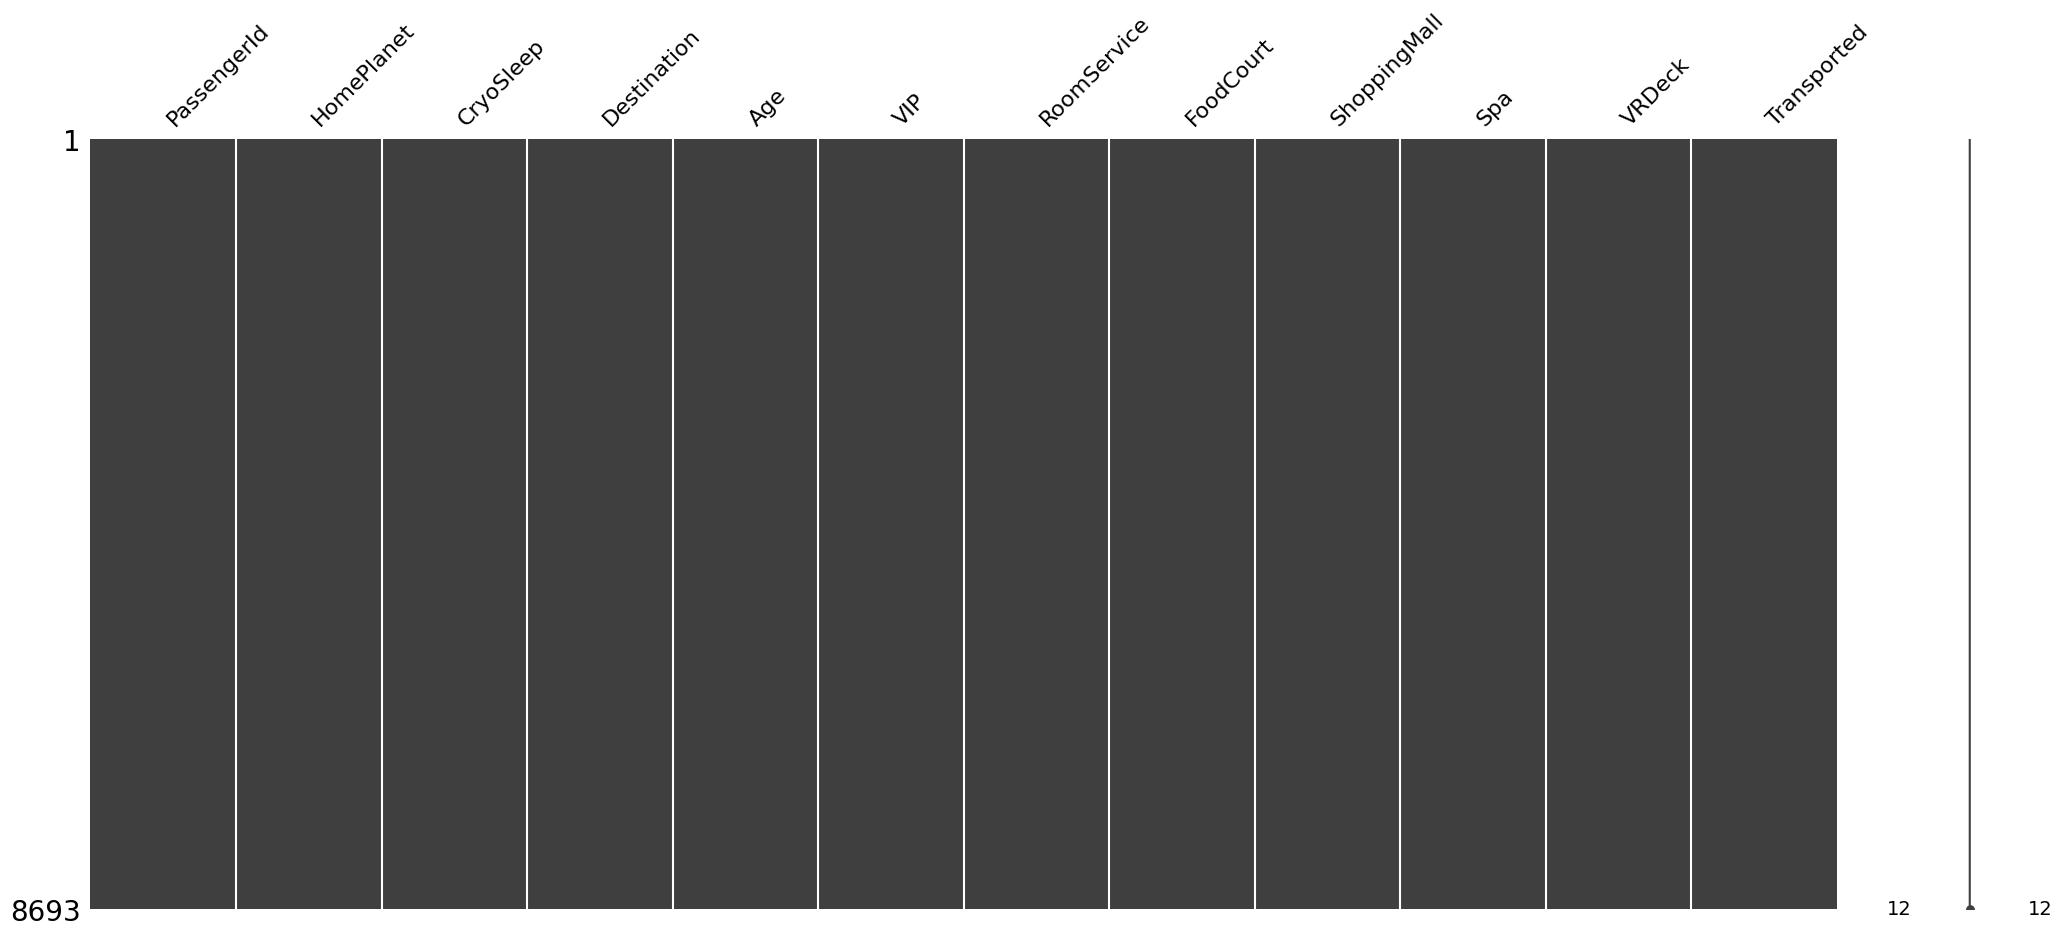

In [56]:
missingno.matrix(df_train)

In [57]:
string_counts_home = df_test["HomePlanet"].value_counts()
string_counts_cryo = df_test["CryoSleep"].value_counts()
string_counts_destination = df_test["Destination"].value_counts()
string_counts_vip = df_test["VIP"].value_counts()

max_string_home = string_counts_home.idxmax()
max_string_cryo = string_counts_cryo.idxmax()
max_string_destination = string_counts_destination.idxmax()
max_string_vip = string_counts_vip.idxmax()

df_test.HomePlanet.fillna(max_string_home, inplace = True)
df_test.CryoSleep.fillna(max_string_cryo, inplace = True)
df_test.Destination.fillna(max_string_destination, inplace = True)
df_test.VIP.fillna(max_string_vip, inplace = True)

<AxesSubplot: >

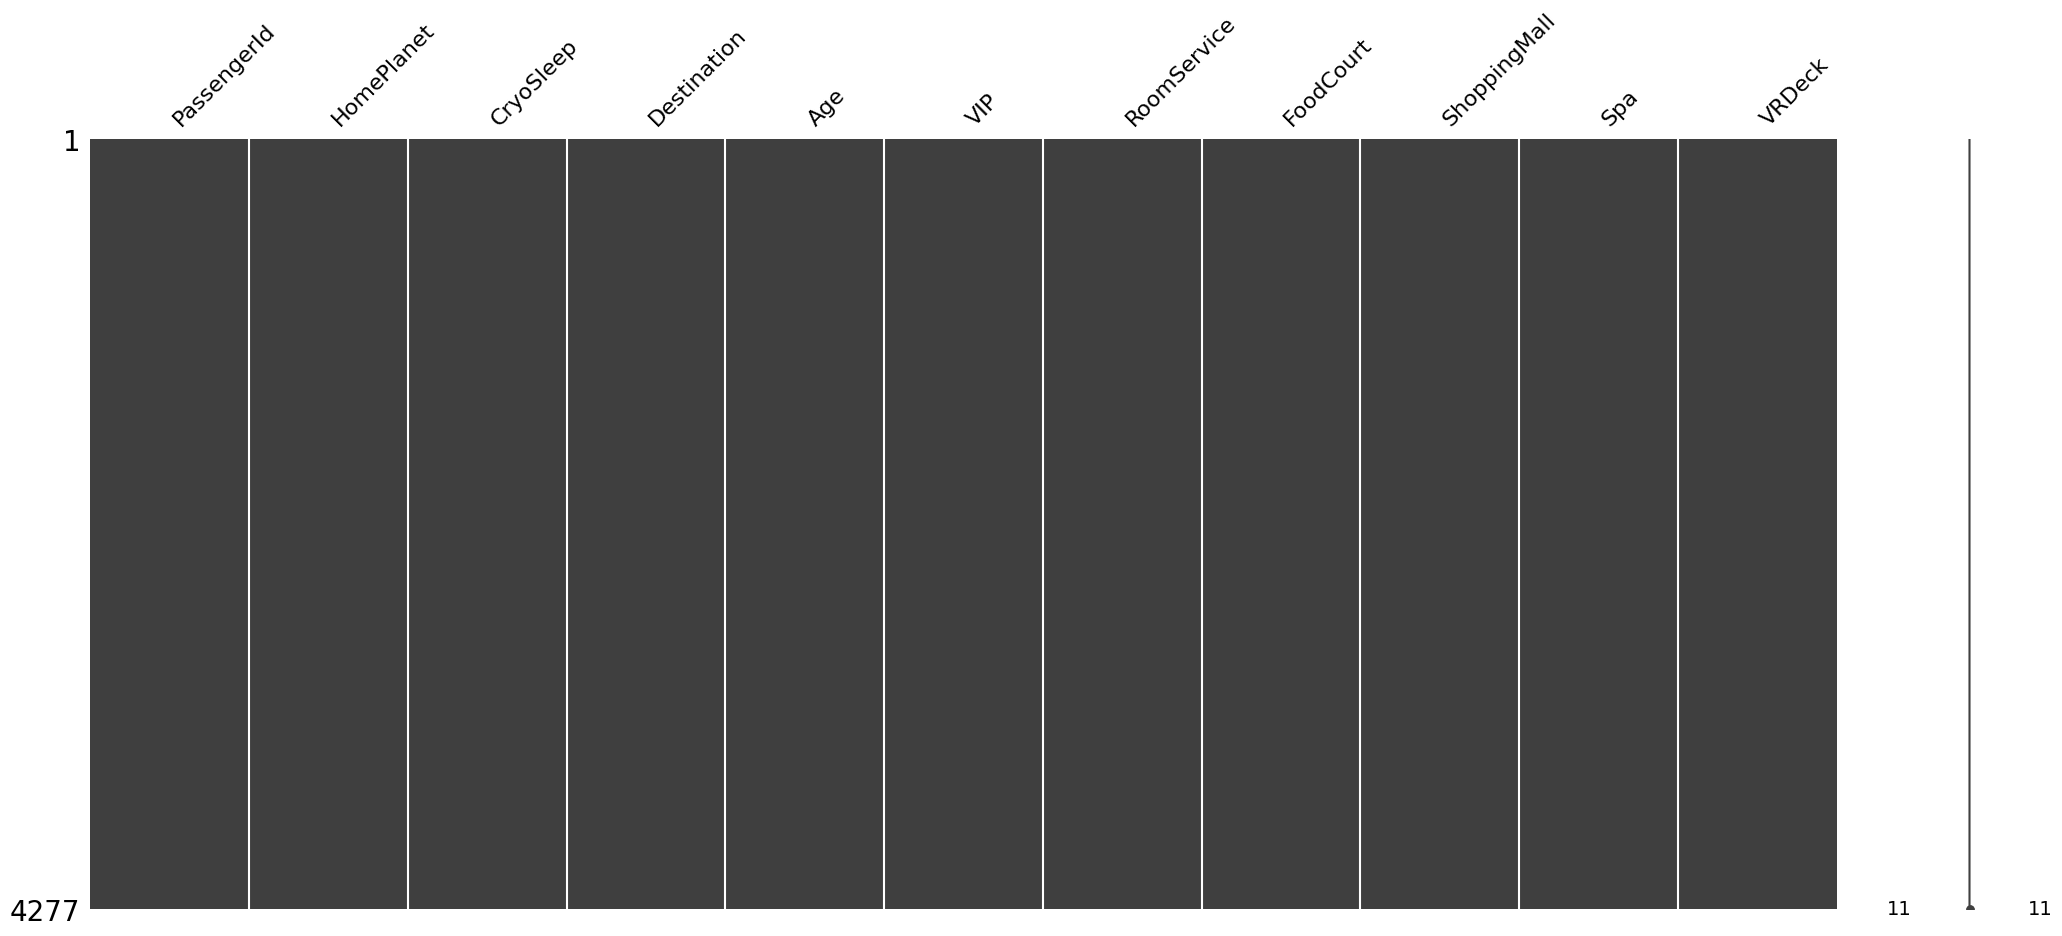

In [58]:
missingno.matrix(df_test)

In [59]:
cat_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [60]:
train_oh = pd.get_dummies(df_train, columns=cat_cols)

In [61]:
train_oh

PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0        0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1        0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2        0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3        0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4        0004_01  16.0        303.0       70.0         151.0   565.0     2.0   
...          ...   ...          ...        ...           ...     ...     ...   
8688     9276_01  41.0          0.0     6819.0           0.0  1643.0    74.0   
8689     9278_01  18.0          0.0        0.0           0.0     0.0     0.0   
8690     9279_01  26.0          0.0        0.0        1872.0     1.0     0.0   
8691     9280_01  32.0          0.0     1049.0           0.0   353.0  3235.0   
8692     9280_02  44.0        126.0     4688.0           0.0     0.0    12.0   

      Transported  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0           False                 0                  1                0   
1            True                 1                  0                0   
2           False                 0                  1                0   
3           False                 0                  1                0   
4            True                 1                  0                0   
...           ...               ...                ...              ...   
8688        False                 0                  1                0   
8689        False                 1                  0                0   
8690         True                 1                  0                0   
8691        False                 0                  1                0   
8692         True                 0                  1                0   

      CryoSleep_False  CryoSleep_True  Destination_55 Cancri e  \
0                   1               0                        0   
1                   1               0                        0   
2                   1               0                        0   
3                   1               0                        0   
4                   1               0                        0   
...               ...             ...                      ...   
8688                1               0                        1   
8689                0               1                        0   
8690                1               0                        0   
8691                1               0                        1   
8692                1               0                        0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_False  VIP_True  
0                             0                        1          1         0  
1                             0                        1          1         0  
2                             0                        1          0         1  
3                             0                        1          1         0  
4                             0                        1          1         0  
...                         ...                      ...        ...       ...  
8688                          0                        0          0         1  
8689                          1                        0          1         0  
8690                          0                        1          1         0  
8691                          0                        0          1         0  
8692                          0                        1          1         0  

[8693 rows x 18 columns]

In [62]:
test_oh = pd.get_dummies(df_test, columns=cat_cols)

In [63]:
test_oh

PassengerId        Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0        0013_01  27.000000          0.0        0.0           0.0     0.0   
1        0018_01  19.000000          0.0        9.0           0.0  2823.0   
2        0019_01  31.000000          0.0        0.0           0.0     0.0   
3        0021_01  38.000000          0.0     6652.0           0.0   181.0   
4        0023_01  20.000000         10.0        0.0         635.0     0.0   
...          ...        ...          ...        ...           ...     ...   
4272     9266_02  34.000000          0.0        0.0           0.0     0.0   
4273     9269_01  42.000000          0.0      847.0          17.0    10.0   
4274     9271_01  28.658146          0.0        0.0           0.0     0.0   
4275     9273_01  28.658146          0.0     2680.0           0.0     0.0   
4276     9277_01  43.000000          0.0        0.0           0.0     0.0   

      VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0        0.0                 1                  0                0   
1        0.0                 1                  0                0   
2        0.0                 0                  1                0   
3      585.0                 0                  1                0   
4        0.0                 1                  0                0   
...      ...               ...                ...              ...   
4272     0.0                 1                  0                0   
4273   144.0                 1                  0                0   
4274     0.0                 0                  0                1   
4275   523.0                 0                  1                0   
4276     0.0                 1                  0                0   

      CryoSleep_False  CryoSleep_True  Destination_55 Cancri e  \
0                   0               1                        0   
1                   1               0                        0   
2                   0               1                        1   
3                   1               0                        0   
4                   1               0                        0   
...               ...             ...                      ...   
4272                0               1                        0   
4273                1               0                        0   
4274                0               1                        1   
4275                1               0                        0   
4276                0               1                        0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_False  VIP_True  
0                             0                        1          1         0  
1                             0                        1          1         0  
2                             0                        0          1         0  
3                             0                        1          1         0  
4                             0                        1          1         0  
...                         ...                      ...        ...       ...  
4272                          0                        1          1         0  
4273                          0                        1          1         0  
4274                          0                        0          1         0  
4275                          0                        1          1         0  
4276                          1                        0          1         0  

[4277 rows x 17 columns]

## StandardScaler

In [64]:
train_oh[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.339054    659.739364   1594.434978    597.417440   1124.675871   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     78.000000    118.000000     45.000000     89.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     304.854791  
std     1133.259049  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       71.000000  
max    24133.000000

In [65]:
test_oh[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4277.000000   4277.000000   4277.000000   4277.000000   4277.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.027384    601.162847   1508.609201    554.357251   1103.913087   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     79.000000    143.000000     51.000000     83.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4277.000000  
mean     310.710031  
std     1235.274606  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       53.000000  
max    22272.000000

In [66]:
train_oh_std = train_oh.copy()

In [67]:
test_oh_std = test_oh.copy()

In [68]:
scaler = StandardScaler()
train_oh_std[num_cols] = scaler.fit_transform(train_oh_std[num_cols])

In [69]:
train_oh[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.339054    659.739364   1594.434978    597.417440   1124.675871   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     78.000000    118.000000     45.000000     89.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     304.854791  
std     1133.259049  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       71.000000  
max    24133.000000

In [70]:
scaler = StandardScaler()
test_oh_std[num_cols] = scaler.fit_transform(test_oh_std[num_cols])

In [71]:
test_oh[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4277.000000   4277.000000   4277.000000   4277.000000   4277.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.027384    601.162847   1508.609201    554.357251   1103.913087   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     79.000000    143.000000     51.000000     83.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4277.000000  
mean     310.710031  
std     1235.274606  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       53.000000  
max    22272.000000

In [72]:
train_oh_std[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8.693000e+03  8.693000e+03  8.693000e+03  8.693000e+03  8.693000e+03   
mean  -1.761440e-16  5.987260e-17  7.356361e-17  7.724179e-17 -5.803351e-17   
std    1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min   -2.010564e+00 -3.405899e-01 -2.873140e-01 -2.908170e-01 -2.766634e-01   
25%   -6.156918e-01 -3.405899e-01 -2.873140e-01 -2.908170e-01 -2.766634e-01   
50%   -1.274865e-01 -3.405899e-01 -2.873140e-01 -2.908170e-01 -2.766634e-01   
75%    5.699497e-01 -2.223546e-01 -2.133024e-01 -2.154885e-01 -1.975250e-01   
max    3.499182e+00  2.137681e+01  1.841192e+01  3.903403e+01  1.964845e+01   

             VRDeck  
count  8.693000e+03  
mean  -6.436816e-17  
std    1.000058e+00  
min   -2.690226e-01  
25%   -2.690226e-01  
50%   -2.690226e-01  
75%   -2.063679e-01  
max    2.102742e+01

In [73]:
test_oh_std[num_cols].describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4.277000e+03  4.277000e+03  4.277000e+03  4.277000e+03  4.277000e+03   
mean  -1.727763e-16  4.568605e-17 -9.967866e-18  3.987147e-17  9.967866e-18   
std    1.000117e+00  1.000117e+00  1.000117e+00  1.000117e+00  1.000117e+00   
min   -2.043253e+00 -3.647795e-01 -2.913516e-01 -3.198592e-01 -2.745577e-01   
25%   -6.173039e-01 -3.647795e-01 -2.913516e-01 -3.198592e-01 -2.745577e-01   
50%   -1.182216e-01 -3.647795e-01 -2.913516e-01 -3.198592e-01 -2.745577e-01   
75%    5.947530e-01 -2.333522e-01 -1.965512e-01 -2.278500e-01 -1.993619e-01   
max    3.589247e+00  1.887851e+01  1.646312e+01  1.463975e+01  1.770360e+01   

             VRDeck  
count  4.277000e+03  
mean  -2.242770e-17  
std    1.000117e+00  
min   -2.515606e-01  
25%   -2.515606e-01  
50%   -2.515606e-01  
75%   -2.086501e-01  
max    1.778055e+01

In [74]:
data_n = df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
data_n

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]

## Data Visualization

In [75]:
cols = data_n.columns
print(cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


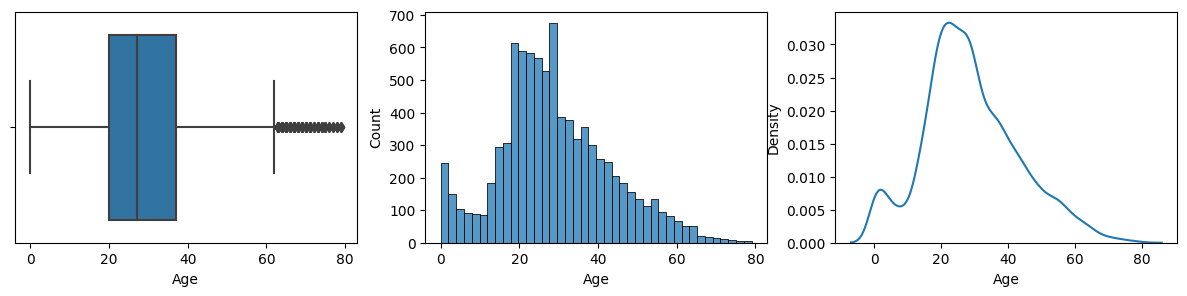

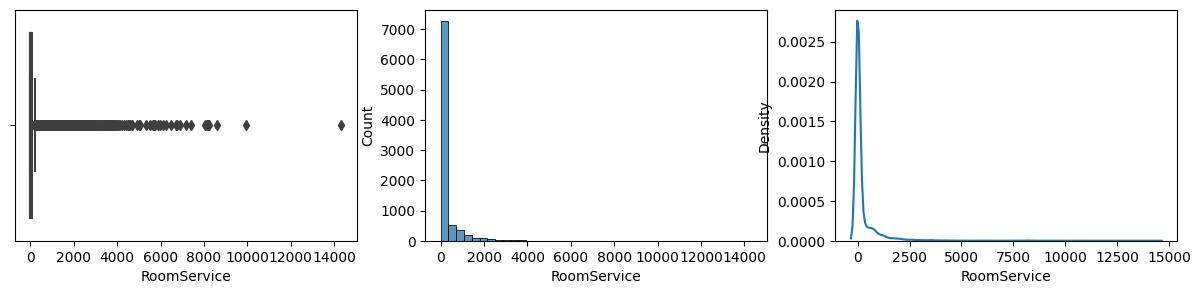

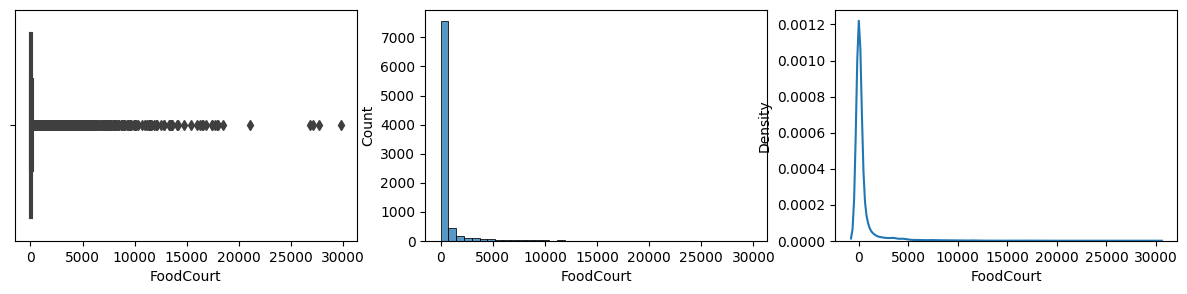

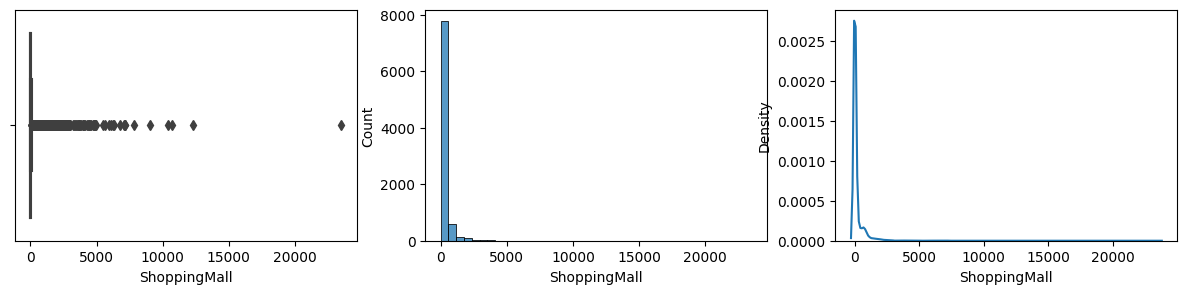

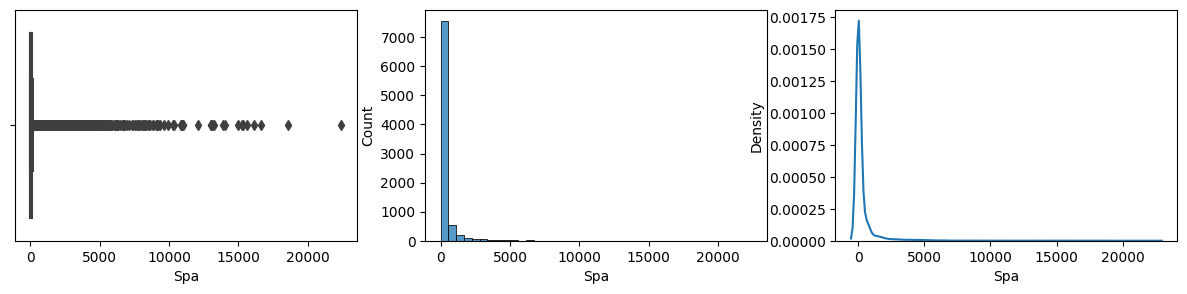

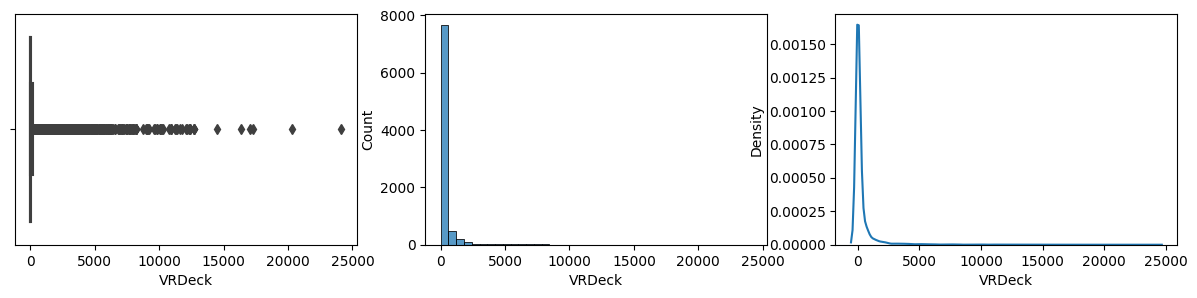

In [76]:
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize = (15,3))
    sns.boxplot(data = data_n, x = col, ax = ax[0])
    sns.histplot(data = data_n, x = col, bins = 40, ax = ax[1])
    sns.kdeplot(data = data_n, x = col, ax = ax[2])
    plt.show()


### NOTE:

    All of the features except 'Age' showing same skewness
    It can be said that all of the data except Age feature is intensely skewed

### Descriptive Statistics : Skewness calculation

    Skewness : statistical values to represent how much your data is asymmetric.
    If your data is symmetrically distributed, then corresponding skewness is zero.
    The more asymmetric your data, the larger skewness.



In [77]:
for col in cols:
    print(f'{col:20s} : skewness = {skew(data_n[col]):10.5f}')

Age                  : skewness =    0.42340
RoomService          : skewness =    6.39886
FoodCourt            : skewness =    7.17692
ShoppingMall         : skewness =   12.77914
Spa                  : skewness =    7.71633
VRDeck               : skewness =    7.90429


In [78]:
train_log = data_n.copy()

In [79]:
for col in cols:
    print(f'{col:20s} : skewness = {skew(data_n[col]):10.5f}')

Age                  : skewness =    0.42340
RoomService          : skewness =    6.39886
FoodCourt            : skewness =    7.17692
ShoppingMall         : skewness =   12.77914
Spa                  : skewness =    7.71633
VRDeck               : skewness =    7.90429


In [80]:
for col in data_n.columns:
    train_log[col] = np.log1p(train_log[col] - np.min(train_log[col]))
    print(f"{col:20s} : {skew(train_log[col]):10.5f}")

Age                  :   -2.27486
RoomService          :    1.03501
FoodCourt            :    1.02437
ShoppingMall         :    1.10114
Spa                  :    1.00562
VRDeck               :    1.06878


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


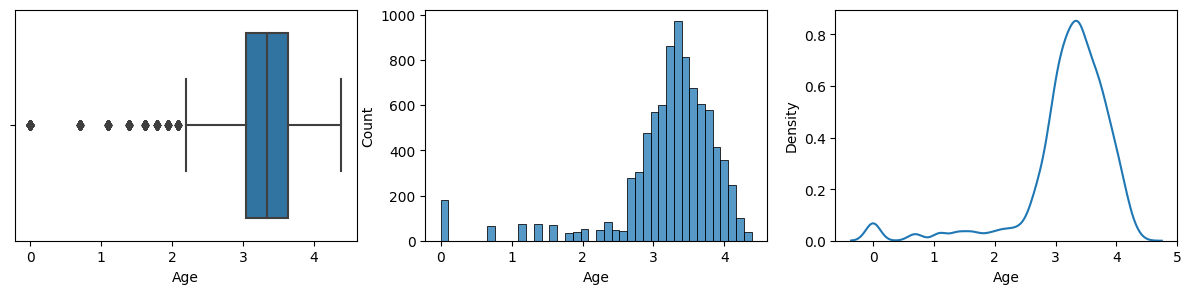

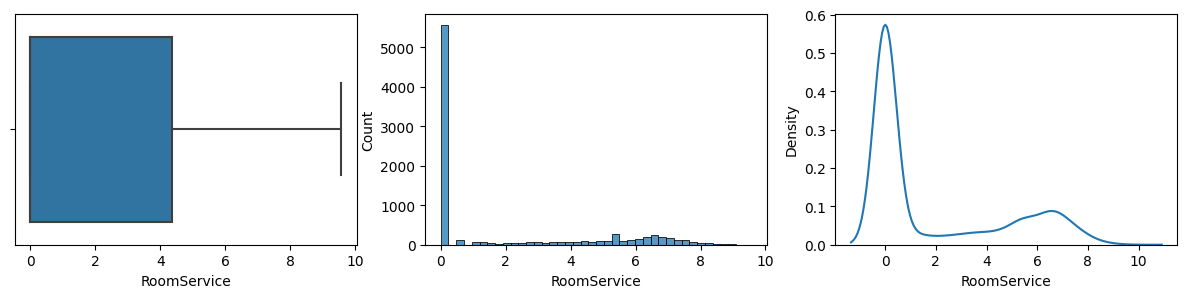

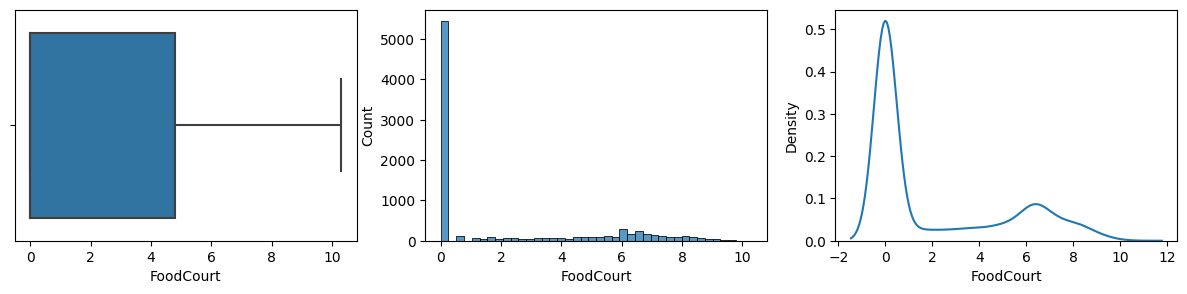

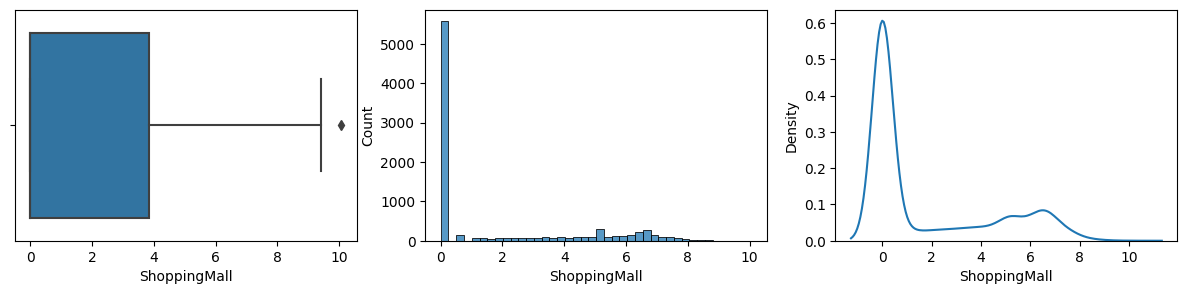

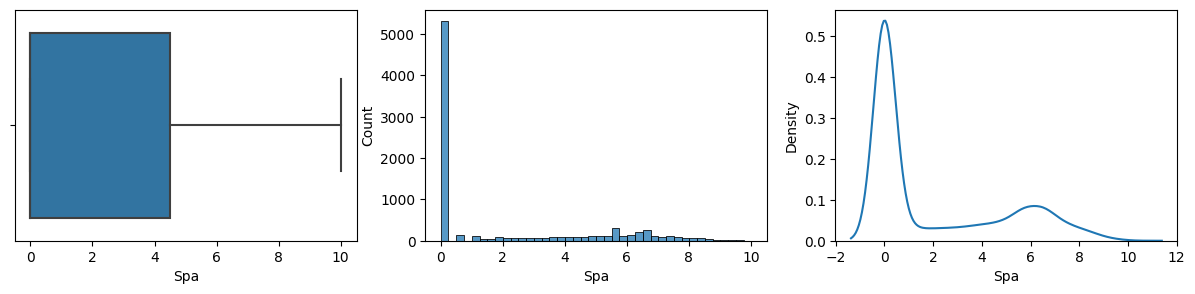

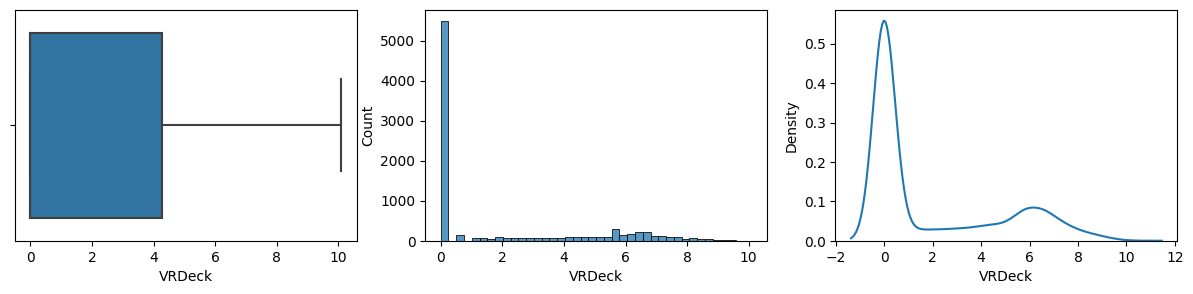

In [81]:
cols = train_log.columns
print(cols)

for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    sns.boxplot(data=train_log,  x= col,  ax=ax[0])
    sns.histplot(data=train_log, x= col,  bins=40, ax=ax[1])
    sns.kdeplot(data=train_log,  x= col,  ax=ax[2])
    plt.show()

In [82]:
train_scaled_d = data_n.copy()

In [83]:
train_scaled_d.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.339054    659.739364   1594.434978    597.417440   1124.675871   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     78.000000    118.000000     45.000000     89.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     304.854791  
std     1133.259049  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       71.000000  
max    24133.000000

In [84]:
scaler = MinMaxScaler()
train_scaled_d[cols] = scaler.fit_transform(train_scaled_d[cols])

In [85]:
train_scaled_d.describe()

Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8693.000000  8693.000000  8693.000000   8693.000000  8693.000000   
mean      0.364911     0.015683     0.015365      0.007395     0.013885   
std       0.181507     0.046049     0.053481      0.025431     0.050191   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.253165     0.000000     0.000000      0.000000     0.000000   
50%       0.341772     0.000000     0.000000      0.000000     0.000000   
75%       0.468354     0.005444     0.003958      0.001916     0.003972   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

            VRDeck  
count  8693.000000  
mean      0.012632  
std       0.046959  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.002942  
max       1.000000

In [86]:
for col in cols:
    print(f"{col:20s} : skewness = {skew(train_scaled_d[col]):10.5f}")

Age                  : skewness =    0.42340
RoomService          : skewness =    6.39886
FoodCourt            : skewness =    7.17692
ShoppingMall         : skewness =   12.77914
Spa                  : skewness =    7.71633
VRDeck               : skewness =    7.90429


In [87]:
for col in data_n.columns:
    train_scaled_d[col] = np.log1p(train_scaled_d[col])
    print(f"{col:20s} : {skew(train_scaled_d[col]):10.5f}")

Age                  :    0.03127
RoomService          :    5.20654
FoodCourt            :    5.92603
ShoppingMall         :    9.02574
Spa                  :    6.47333
VRDeck               :    6.67888


In [88]:
data = pd.concat([df_train, df_test], axis=0)

In [89]:
y = train_oh_std['Transported']
X = train_oh_std.drop('Transported', axis=1)
X_test = test_oh_std

In [95]:
kfold = KFold(n_splits=5, shuffle=True, random_state=143)

In [91]:
val_score = np.zeros(5, float)
print(val_score)

[0. 0. 0. 0. 0.]


In [97]:
sub_df = pd.read_csv('sample_submission.csv', index_col='PassengerId')
sub_df['total'] = 0

In [98]:
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    # STEP 01. Preparing features and labels of training and validation subsets. 
    X_tr, y_tr   = X.iloc[tr_idx], y.iloc[tr_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # STEP 02. Choosing Model and Training
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    # STEP 03. Validation : Your trained model makes predictions by using X_val. 
    y_pred = model.predict(X_val)
    
    # STEP 04. Evaluation : Measure your model's performance
    score = accuracy_score(y_val, y_pred)
    
    val_score[i] = score
    # STEP 05. Print Model's Performance 
    print(f"iteration {i}: score = {score}")  # formatted printing
    
    # STEP 06. Prediction
    pred = model.predict(X_test)
    sub_df[f'fold{i+1}'] = pred
    sub_df['total'] += pred

iteration 0: score = 0.5066129959746981
iteration 1: score = 0.5043128234617597
iteration 2: score = 0.48878665899942497
iteration 3: score = 0.5097813578826237
iteration 4: score = 0.5086306098964327


In [115]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=143)
val_scores = np.zeros(5, float)

for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
        # STEP 01. Preparing features and labels of training and validation subsets. 
    X_tr, y_tr   = X.iloc[tr_idx], y.iloc[tr_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # STEP 02. Choosing Model and Training
    model = RandomForestClassifier()
    model.fit(X_tr, y_tr)

    # STEP 03. Validation : Your trained model makes predictions by using X_val. 
    y_pred = model.predict(X_val)

    # STEP 04. Evaluation : Measure your model's performance
    score = accuracy_score(y_val, y_pred)

    val_scores[i] = score
    
    # STEP 06. Prediction
    sub_df[f'fold{i+1}'] = pred
    sub_df['total'] += pred
    

In [116]:
print(val_scores)
print(np.mean(val_scores))

[0.78033353 0.78090857 0.79183439 0.77675489 0.77387802]
0.780741878425692


In [117]:
sub_df['Transported'] = sub_df['total'].apply(lambda x: 1 if x>2.5 else 0)

In [118]:
sub_df.head(5)

Transported  total  fold1  fold2  fold3  fold4  fold5
PassengerId                                                       
0013_01                1     10   True   True   True   True   True
0018_01                1     10   True   True   True   True   True
0019_01                1     10   True   True   True   True   True
0021_01                1     10   True   True   True   True   True
0023_01                1     10   True   True   True   True   True

In [119]:
sub_df['Transported'] = pred.astype(bool)

In [120]:
sub_df['Transported'].to_csv('submission.csv')